## Importing Neccessary Libraries


In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Multiple Linear Regression

### Importing Dataset

In [317]:
ledf = pd.read_csv('Life Expectancy Data.csv')

### EDA

In [318]:
ledf.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [319]:
ledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [320]:
ledf.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [321]:
ledf.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Splitting Independent(x) and Dependent(y) features

In [322]:
x = ledf.iloc[:,[0,2,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20]]
y = ledf.iloc[:,3]

In [323]:
x

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
0,Afghanistan,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479
1,Afghanistan,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476
2,Afghanistan,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470
3,Afghanistan,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463
4,Afghanistan,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407
2934,Zimbabwe,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418
2935,Zimbabwe,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427
2936,Zimbabwe,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427


In [324]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Status                           2938 non-null   object 
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2904 non-null   float64
 9   Polio                            2919 non-null   float64
 10  Total expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12   HIV/AIDS           

In [325]:
y

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2
...,...
2933,44.3
2934,44.5
2935,44.8
2936,45.3


### Encoding (Categorical Features to Numerical Features)

In [326]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_en = LabelEncoder()
x['Country'] = label_en.fit_transform(x['Country'])
x['Status'] = label_en.fit_transform(x['Status'])



<ipython-input-326-2e6d9b2b1903>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Country'] = label_en.fit_transform(x['Country'])
<ipython-input-326-2e6d9b2b1903>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Status'] = label_en.fit_transform(x['Status'])


In [327]:
x.head()

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources
0,0,1,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479
1,0,1,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476
2,0,1,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470
3,0,1,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463
4,0,1,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454


In [328]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2904 non-null   float64
 9   Polio                            2919 non-null   float64
 10  Total expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12   HIV/AIDS           

### Creating a Dataframe with only independent and dependent features

In [329]:
new_ledf = pd.concat([x,y],axis=1)
new_ledf.head()

,Country,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Life expectancy
0,0,1,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,65.0
1,0,1,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,59.9
2,0,1,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,59.9
3,0,1,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,59.5
4,0,1,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,59.2


<Axes: >

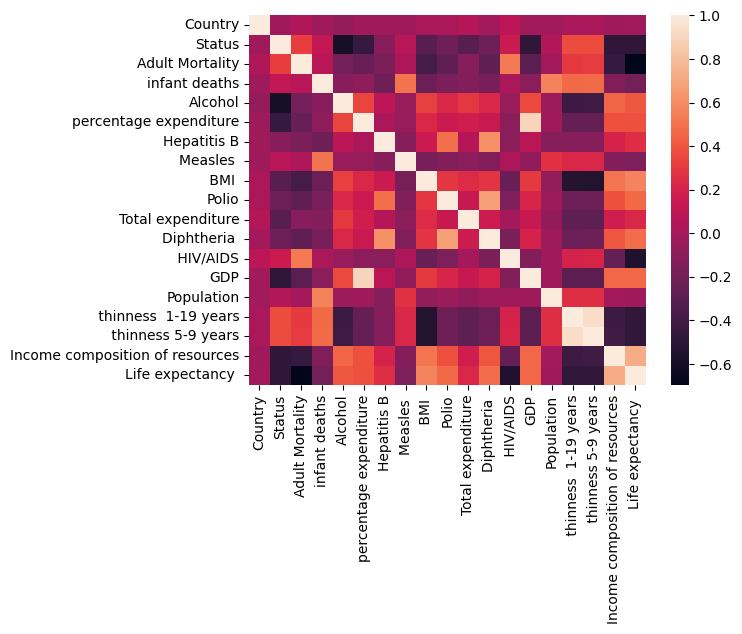

In [330]:
sns.heatmap(new_ledf.corr())

### Handling Missing Values using Mean Imputation

In [331]:
x.isna().sum()

,0
Country,0
Status,0
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34
Polio,19


In [332]:
y.isna().sum()

10

In [333]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
x = pd.DataFrame(si.fit_transform(x))
y = pd.DataFrame(y)
y = pd.DataFrame(si.fit_transform(y))

In [334]:
x.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [335]:
y.isna().sum()

,0
0,0


### HeatMap

### Spliting Dataframe for training and testing

In [336]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [337]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2350 entries, 683 to 2732
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2350 non-null   float64
 1   1       2350 non-null   float64
 2   2       2350 non-null   float64
 3   3       2350 non-null   float64
 4   4       2350 non-null   float64
 5   5       2350 non-null   float64
 6   6       2350 non-null   float64
 7   7       2350 non-null   float64
 8   8       2350 non-null   float64
 9   9       2350 non-null   float64
 10  10      2350 non-null   float64
 11  11      2350 non-null   float64
 12  12      2350 non-null   float64
 13  13      2350 non-null   float64
 14  14      2350 non-null   float64
 15  15      2350 non-null   float64
 16  16      2350 non-null   float64
 17  17      2350 non-null   float64
dtypes: float64(18)
memory usage: 348.8 KB


### Fitting Model to Training set

In [338]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(x_train,y_train)

LinearRegression()

### Prediction

In [339]:
y_pred = lg.predict(x_test)
print(y_pred)

[[75.79233218]
 [66.77252381]
 [52.17158853]
 [67.46840642]
 [60.14394713]
 [57.38688663]
 [70.95198426]
 [78.98982848]
 [70.34129383]
 [47.21756585]
 [67.7564118 ]
 [80.29932681]
 [72.68453584]
 [74.228659  ]
 [57.6969157 ]
 [72.36385094]
 [60.27933718]
 [66.31362166]
 [70.92835043]
 [82.48377086]
 [68.765493  ]
 [74.20047874]
 [74.34730406]
 [81.28400903]
 [67.10794444]
 [60.00367612]
 [80.94093668]
 [71.41704706]
 [70.01480035]
 [68.20019005]
 [76.16487203]
 [53.1913879 ]
 [76.18340332]
 [76.09494569]
 [75.87888794]
 [72.13711853]
 [73.51375081]
 [82.2721927 ]
 [62.99706303]
 [71.01489727]
 [64.93422943]
 [72.0881538 ]
 [74.89709137]
 [73.47895638]
 [71.93422468]
 [79.78429342]
 [61.69760083]
 [73.41503952]
 [55.75201753]
 [72.53788401]
 [73.49048339]
 [62.99901043]
 [77.86472038]
 [69.93667513]
 [62.8425606 ]
 [70.77310668]
 [81.29338097]
 [70.69762781]
 [59.81218626]
 [71.69652499]
 [69.33109121]
 [71.07800934]
 [72.51925807]
 [66.97430091]
 [58.95002289]
 [74.0909877 ]
 [72.58673

In [340]:
type(y_pred)

numpy.ndarray

In [341]:
print(y_test)


         0
867   77.3
1780  66.6
621   52.6
2715  61.5
2717  60.0
...    ...
1290  81.3
2724  53.2
392   72.6
27    73.0
674   83.0

[588 rows x 1 columns]


In [342]:
lg.coef_

array([[ 3.47431126e-03, -1.77270759e+00, -2.13209424e-02,
        -2.27806032e-03,  9.53859295e-02,  1.09726741e-04,
        -1.93266918e-02, -3.26039690e-05,  5.81567602e-02,
         3.74908272e-02,  1.30964342e-01,  5.00835055e-02,
        -4.58520873e-01,  3.39239599e-05,  3.54705415e-09,
        -1.37499358e-01,  7.63275870e-02,  1.25629533e+01]])

In [343]:
lg.intercept_

array([57.71409725])

### Accuracy

In [344]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7841100297364605